## Intelligent Portfolio Management  

## Introduction  
A complete pipeline that blends **machine learning** with **classical portfolio optimisation** to create **diversified, risk-controlled, and realistic portfolios**.  

## Outline of Project Work 
1. **Data Prep** – Load & clean multiple financial datasets  
2. **EDA** – Time series, heatmap, boxplots, distributions  
3. **Risk–Return** – Excess returns, Sharpe ratio ranking  
4. **PCA** – Reduce noise, capture hidden risk factors  
5. **Clustering** – Group similar assets, enforce diversification  
6. **Optimisation** – Min-variance & mean-variance portfolios with constraints  
7. **Forecasting** – Ridge, RF, SVR → Ridge selected (best R², lowest RMSE)  
8. **Portfolio Selection** – Use Ridge forecasts to build optimal portfolio  
9. **Evaluation** – Compare vs S&P 500, run factor analysis  
10. **Conclusion** – Ridge + PCA + clustering → robust, intelligent portfolios  

➡️ *From raw data → to smart, investable strategies.*


In [ ]:
#  Data Handling
import pandas as pd
import numpy as np
import datetime as dt

#  Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')  # clean style for plots

#  Statistics & Finance
from scipy.stats import norm, zscore

#  Machine Learning Models
from sklearn.cluster import KMeans                           
#  Model Evaluation & Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#  Warnings Suppression (optional)
import warnings
warnings.filterwarnings('ignore')

#  For dimensionality reduction
from sklearn.decomposition import PCA


## Step 1: Importing Libraries  

**Core Stack**  
- `pandas`, `numpy` → data handling  
- `matplotlib`, `seaborn` → visualization  
- `scikit-learn` → PCA and K-Means clustering  

➡️ These libraries form the foundation for data processing, visualization, and machine learning in this project.

In [ ]:
path = r"Raveena2025/Intelligent-Portifolio-Management/"


# Sample load commands for important files
assets = pd.read_csv(path + "Assets_7.csv", index_col=0, parse_dates=True)
sp500 = pd.read_csv(path + "SP500.csv", index_col=0, parse_dates=True)
factors = pd.read_csv(path + "F-F_Research_Data_Factors_m.csv", index_col=0)
brka = pd.read_csv(path + "BRK-A.csv")
ff_industry_30_vw = pd.read_csv(path + "ind30_m_vw_rets.csv", index_col=0)
edhec_hfi = pd.read_csv(path + "edhec-hedgefundindices.csv", index_col=0)

# Standardize index formats
assets.index = pd.to_datetime(assets.index).to_period("M")
sp500.index = pd.to_datetime(sp500.index).to_period("M")
factors.index = pd.to_datetime(factors.index, format="%Y%m").to_period("M")


## Step 2: Load Datasets  

 **Datasets Used**  
- **Assets_7.csv** → Investable asset universe  
- **SP500.csv** → Benchmark index  
- **Fama-French 3 Factors** → Market, size, and value factors  
- **BRK-A** → Berkshire Hathaway stock  
- **FF-Industry 30** → Industry portfolios  
- **EDHEC Hedge Fund Indices** → Alternative strategies  

➡️ All datasets are standardised to **monthly frequency** for consistency.


In [ ]:
print(" Assets (7):")
print(assets.head(), "\n")

print(" S&P 500:")
print(sp500.head(), "\n")

print(" Fama-French Factors:")
print(factors.head(), "\n")

print(" Berkshire Hathaway (BRK-A):")
print(brka.head(), "\n")

print(" FF Industry 30 (VW Returns):")
print(ff_industry_30_vw.head(), "\n")

print(" EDHEC Hedge Fund Indices:")
print(edhec_hfi.head(), "\n")


 Assets (7):
         US Equities  World Equities  US Treasuries  High Yield  Real Estate  \
1985-01         3.69         443.231       100.0000     112.905       382.65   
1985-02         3.99         455.868       101.9243     117.185       404.31   
1985-03         4.11         451.672       100.1330     118.672       410.96   
1985-04         4.08         485.608       102.0311     119.185       408.20   
1985-05         4.03         484.414       104.1377     121.356       408.57   

         Commodities  Corp Bonds    T-bill    TIPS  Regime-5  Regime-7  \
1985-01       769.53      245.62  564.0916   0.30%         1         1   
1985-02       785.96      252.75  567.9944  -1.12%         1         1   
1985-03       774.00      246.33  571.6528   1.61%         1         1   
1985-04       802.77      251.11  575.8523   2.37%         1         1   
1985-05       774.58      256.72  579.6807   5.26%         1         1   

         Regime-9  
1985-01         1  
1985-02         1  
1

In [ ]:
# Define datasets in a dictionary for looped inspection
datasets = {
    "Assets": assets,
    "SP500": sp500,
    "FamaFrench_Factors": factors,
    "BRK-A": brka,
    "FF_Industry_30_VW": ff_industry_30_vw,
    "EDHEC_HFI": edhec_hfi
}

# Loop through each dataset and check data types, missing values, and duplicates
for name, df in datasets.items():
    print(f" Dataset: {name}")
    print(" Data Types:")
    print(df.dtypes)
    print("\n Missing Values (per column):")
    print(df.isnull().sum())
    print(f"\n Number of Duplicate Rows: {df.duplicated().sum()}")
    print("-" * 50, "\n")


 Dataset: Assets
 Data Types:
US Equities       float64
World Equities    float64
US Treasuries     float64
High Yield        float64
Real Estate       float64
Commodities       float64
Corp Bonds        float64
T-bill            float64
TIPS               object
Regime-5            int64
Regime-7            int64
Regime-9            int64
dtype: object

 Missing Values (per column):
US Equities       0
World Equities    0
US Treasuries     0
High Yield        0
Real Estate       0
Commodities       0
Corp Bonds        0
T-bill            0
TIPS              0
Regime-5          0
Regime-7          0
Regime-9          0
dtype: int64

 Number of Duplicate Rows: 0
-------------------------------------------------- 

 Dataset: SP500
 Data Types:
SP500      float64
SP500TR    float64
dtype: object

 Missing Values (per column):
SP500      0
SP500TR    0
dtype: int64

 Number of Duplicate Rows: 0
-------------------------------------------------- 

 Dataset: FamaFrench_Factors
 Data Types:
M

##  Data Quality Check  

 **Results**  
-  No missing values across all datasets.  
-  No duplicate rows found.  
- Data types are correct:  
  - Most columns are `float64` or `int64`.  
  - BRK-A has `Date` as object (expected).  
  - Assets dataset had `TIPS` as `object` due to percentage symbols, later cleaned.  

➡️ Overall, the datasets are **clean and consistent**

In [ ]:
print(" Summary Statistics for Assets Dataset:")
display(assets.describe())


 Summary Statistics for Assets Dataset:


,US Equities,World Equities,US Treasuries,High Yield,Real Estate,Commodities,Corp Bonds,T-bill,Regime-5,Regime-7,Regime-9
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,40.148064,3710.842924,455.047407,763.465966,2400.644543,3387.565737,1350.630434,1308.167699,0.760391,0.726161,0.745721
std,31.955956,2071.395944,236.308098,547.799353,2064.158503,1776.662135,806.955424,391.004520,0.650261,0.688366,0.667074
min,3.690000,443.231000,100.000000,112.905000,366.460000,729.600000,245.620000,564.091600,-1.000000,-1.000000,-1.000000
25%,12.770000,1904.053000,248.833800,335.625000,687.120000,2253.928000,667.152000,953.683600,1.000000,1.000000,1.000000
50%,36.100000,3173.854000,438.804500,549.996000,1479.800000,2966.450000,1210.792000,1430.011000,1.000000,1.000000,1.000000
75%,52.000000,5434.345000,686.692000,1126.509000,3698.610000,4557.699000,2001.866000,1712.561000,1.000000,1.000000,1.000000
max,145.475000,8584.681000,836.697800,2048.399700,7593.400000,10636.480000,2901.783000,1773.346300,1.000000,1.000000,1.000000


<Figure size 1400x600 with 0 Axes>

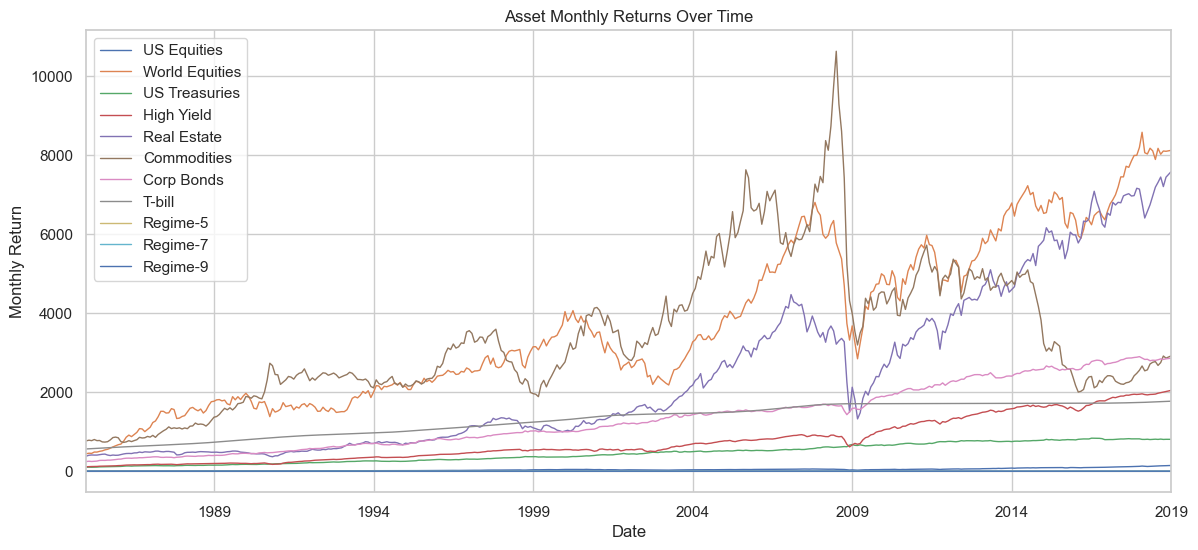

In [ ]:
plt.figure(figsize=(14, 6))
assets.plot(figsize=(14, 6), linewidth=1)
plt.title("Asset Monthly Returns Over Time")
plt.ylabel("Monthly Return")
plt.xlabel("Date")
plt.grid(True)
plt.show()


## Step 3: Asset Monthly Returns Over Time  

**Chart Insights**  
- **World Equities & Real Estate** → highest long-term growth but also major volatility (notably the 2008 crisis).  
- **T-bills & US Treasuries** → very stable growth, safe-haven assets with lower returns.  
- **Commodities & High Yield Bonds** → cyclical patterns, exposed to market cycles.  
- **Regime indicators** stay relatively flat, acting more as signals than investable assets.  

➡️ This graph illustrates the **risk–return trade-off** across asset classes 
    and underscores the need for PCA, clustering, and optimisation to design diversified, stable portfolios.

## Assets Dataset is Plotted  
  
- assets contains the **core investable asset classes** (equities, bonds, real estate, commodities, T-bills, TIPS, etc.).  
The other datasets, while valuable in their own contexts (e.g., factor analysis, sector rotation, or benchmarking), were either outside the project scope or lacked the compatibility needed for clustering, optimization, and forecasting steps.

Ultimately utilized only Assets_7.csv as it offered a clean, diverse, and well-aligned dataset suitable for the end-to-end pipeline. 

➡️ Focusing on the assets dataset here helps clearly show the **historical return trajectories** of the portfolio’s main investment options.



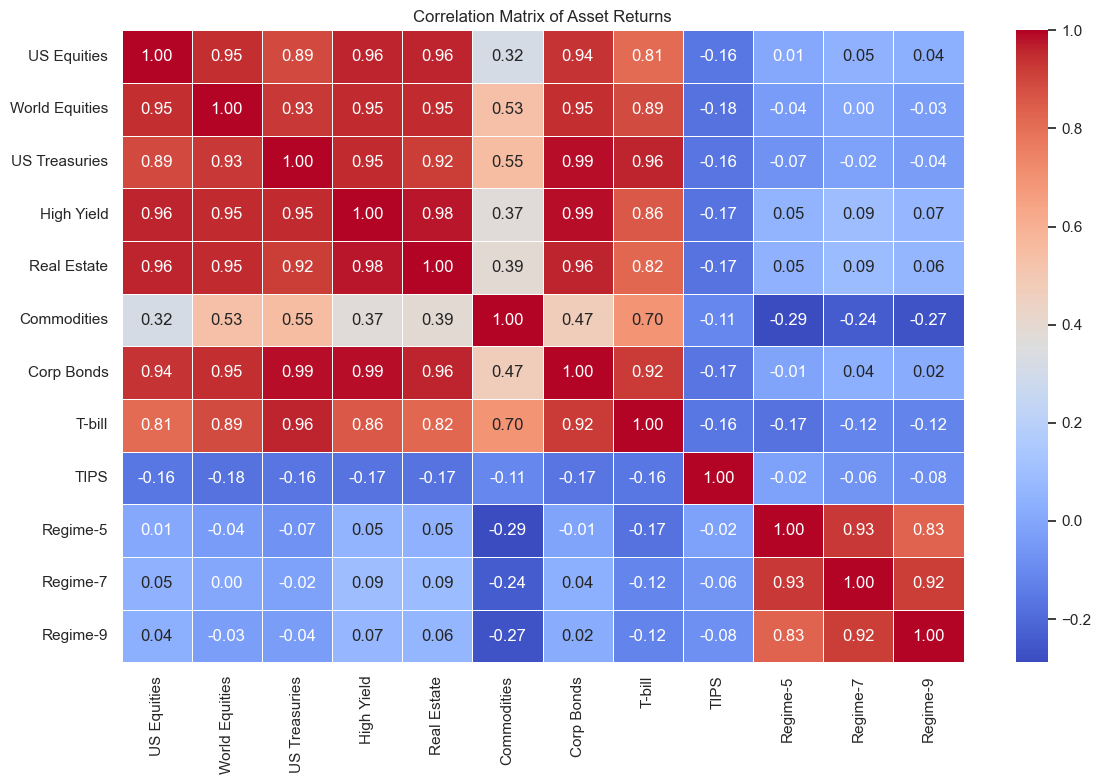

In [ ]:
# Clean all percentage columns in assets dataset
for col in assets.columns:
    if assets[col].dtype == 'object':
        assets[col] = assets[col].str.replace('%', '')  # remove %
        assets[col] = pd.to_numeric(assets[col], errors='coerce') / 100  # convert to float and scale

# Now calculate correlation matrix
correlation_matrix = assets.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Asset Returns")
plt.tight_layout()
plt.show()


## Step 4: Correlation Matrix of Asset Returns  
 **Correlation**  
- Measures how two variables move together.  
- Range: **-1 to +1**  
  - +1 → move in the same direction (perfect positive)  
  - 0 → no linear relationship  
  - -1 → move in opposite directions (perfect negative)  

**Heatmap**  
- A colour-coded visual of the correlation matrix.  
- Red = strong positive correlation, Blue = negative correlation, White = weak/none.  

**Insights from Heatmap**  
- **Very high correlations (0.9+)** among US Equities, World Equities, High Yield, Real Estate, Treasuries, and Corp Bonds → low diversification if combined directly.  
- **Commodities** show moderate correlation, offering diversification benefits.  
- **TIPS** show weak/negative correlation → potential hedge.  
- **Regime variables** are highly correlated with each other but largely independent from asset returns.  

➡️ High correlations motivate the use of **PCA** and **clustering**, to capture hidden risk factors and avoid concentration in similar assets.
- Detects highly correlated assets (risk of redundancy).  
- Identifies diversifying assets (low/negative correlation).  



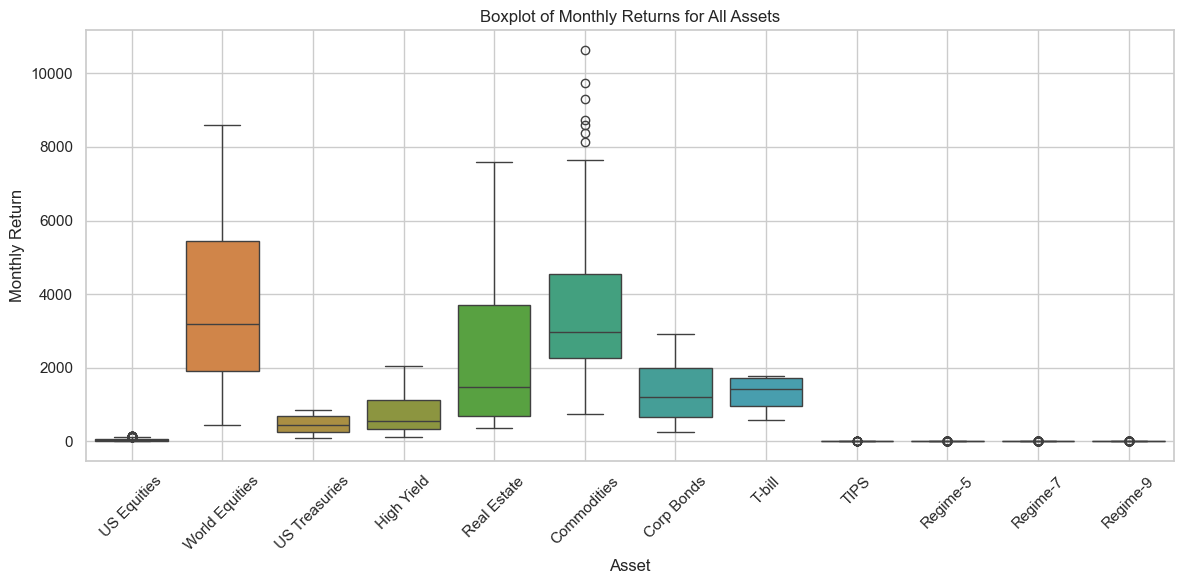

In [ ]:
# Boxplot of Asset Returns
plt.figure(figsize=(12, 6))
sns.boxplot(data=assets)
plt.title("Boxplot of Monthly Returns for All Assets")
plt.ylabel("Monthly Return")
plt.xlabel("Asset")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 5: Boxplot of Monthly Returns  

**Insights from Boxplot**  
- **World Equities & Real Estate** → widest spread of returns, high volatility, frequent outliers.  
- **Commodities** → extreme spikes, highly cyclical and risky.  
- **US Treasuries, Corp Bonds, T-bills** → narrower ranges, representing stability and predictable performance.  
- **TIPS & Regime variables** → very limited variability, functioning more as signals/hedges than return drivers.  

➡️ Confirms the **risk–return trade-off**: assets with higher return potential also carry greater volatility. This insight justifies portfolio diversification and optimisation techniques applied later.


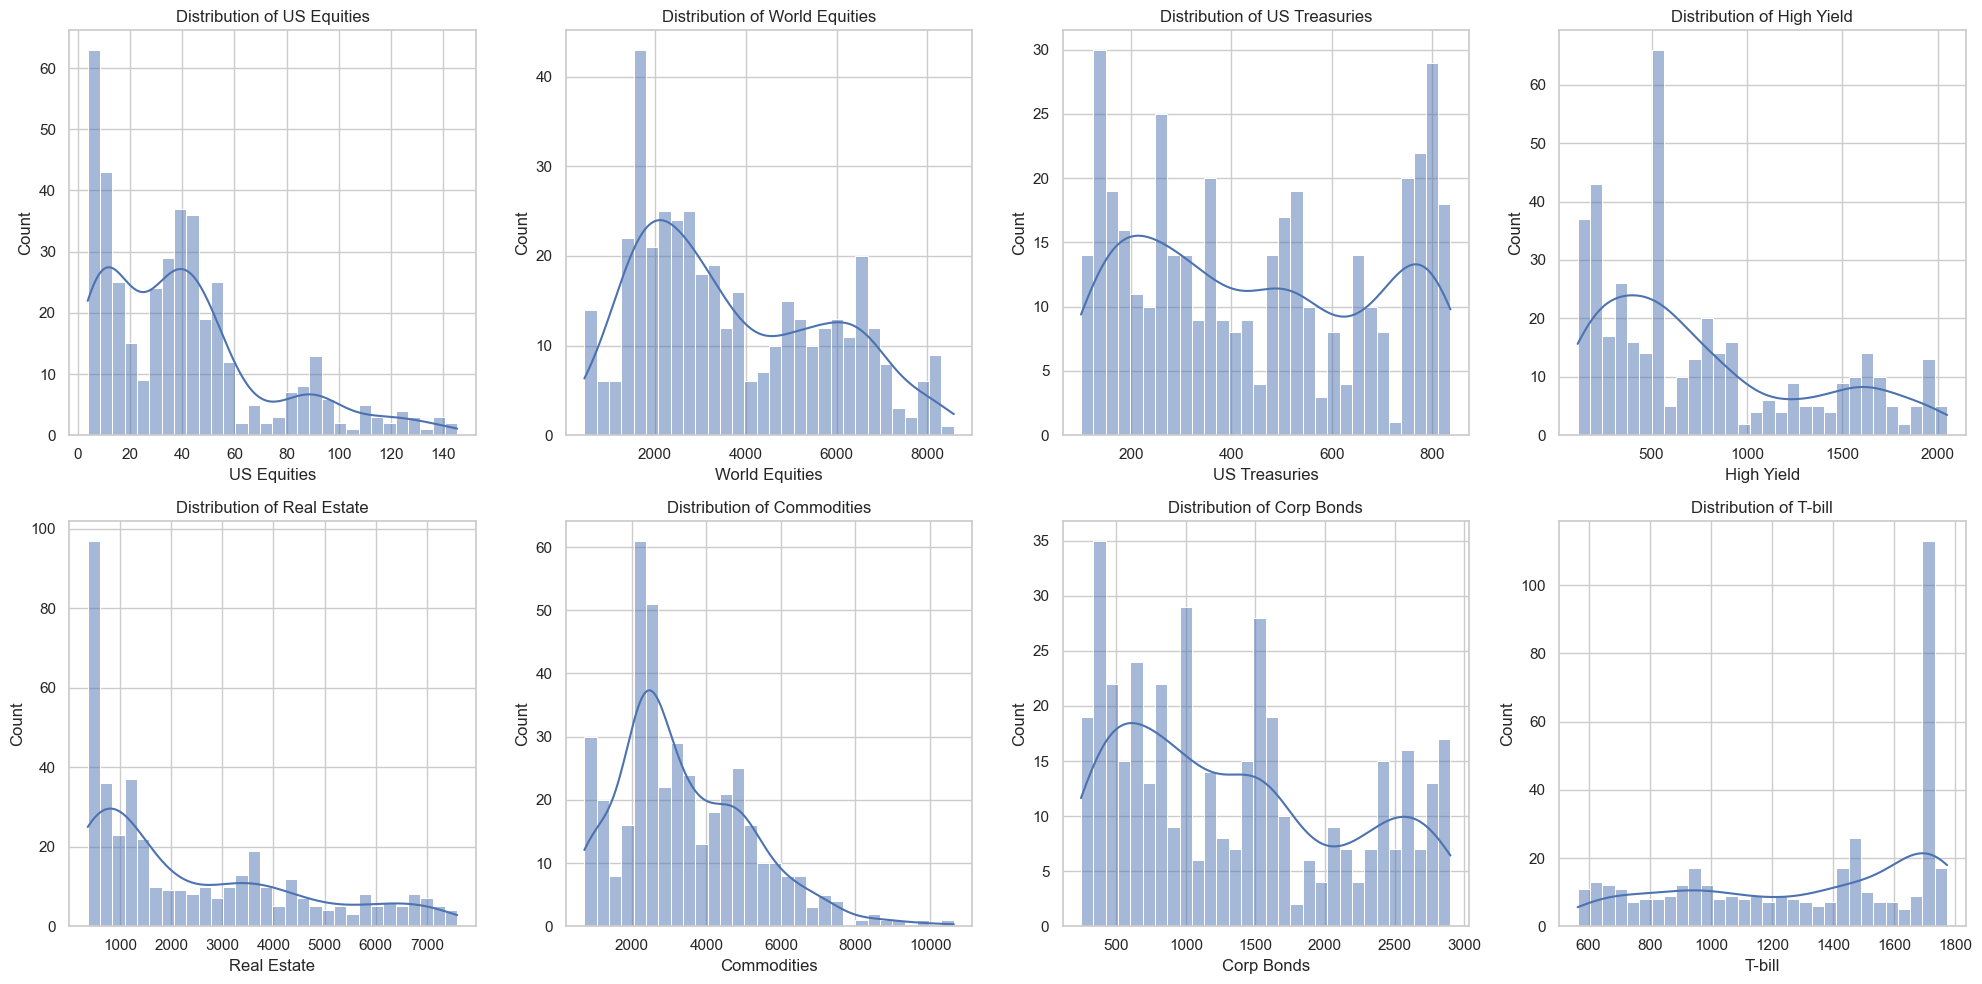

In [ ]:
# Set up figure
asset_cols = assets.columns[:8]  
n_cols = 4
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()

# Loop and plot
for i, col in enumerate(asset_cols):
    sns.histplot(assets[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].grid(True)

# Tight layout
plt.tight_layout()
plt.show()


## Step 6: Distribution of Asset Returns  

 **Insights from Histograms**  
- **US & World Equities, Real Estate** →  indicating high growth potential but greater risk.  
- **Commodities** → wide spread with extreme spikes, confirming their volatility and cyclical behaviour.  
- **US Treasuries, Corp Bonds, T-bills** → narrower, more symmetric distributions, reflecting lower risk and steady performance.  

➡️ These distribution patterns highlight the **different risk–return profiles** of assets and support the case for diversification — combining growth assets with stable safe havens.


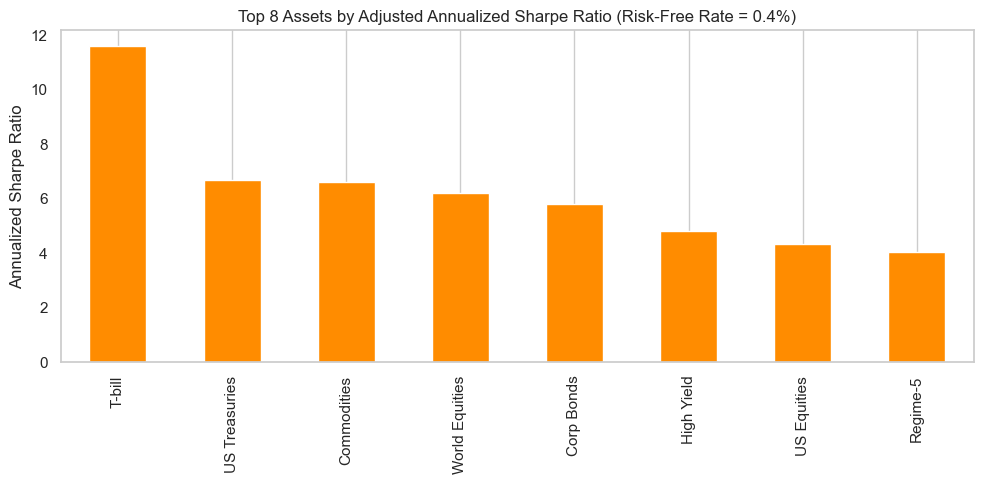

In [ ]:
monthly_returns = assets.copy()
monthly_returns = assets.astype(float)  


# Risk-free rate (monthly)
risk_free_rate = 0.004  

# Monthly excess returns
excess_returns = monthly_returns - risk_free_rate

# Mean and standard deviation of excess returns
mean_excess = excess_returns.mean()
std_dev = monthly_returns.std()  # use total standard deviation

# Annualized Sharpe Ratio
sharpe_ratios = (mean_excess / std_dev) * np.sqrt(12)

# Get top 8 Sharpe Ratios
top8_sharpe = sharpe_ratios.sort_values(ascending=False).head(8)

# Plot
plt.figure(figsize=(10, 5))
top8_sharpe.plot(kind='bar', color='darkorange')
plt.title("Top 8 Assets by Adjusted Annualized Sharpe Ratio (Risk-Free Rate = 0.4%)")
plt.ylabel("Annualized Sharpe Ratio")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



## Step 7: Top 8 Assets by Adjusted Annualised Sharpe Ratio  

**Sharpe Ratio Results (Risk-Free = 0.4%)**  
The value 0.004 was chosen as the monthly risk-free rate to approximate a realistic annualized return of 4.8%, reflecting average short-term government bond yields such as U.S. 3-month Treasury Bills. This allows for accurate and consistent Sharpe Ratio calculations aligned with the monthly frequency of the asset return data.

This code calculates the annualized Sharpe Ratio for each asset by first computing monthly excess returns (subtracting a fixed monthly risk-free rate of 0.004 from the asset returns). It then divides the mean excess return by the standard deviation of total returns, and scales the result by √12 to annualize the ratio, providing a measure of risk-adjusted return.

- **T-bills** → highest Sharpe ratio, extremely stable returns relative to risk.  
- **US Treasuries & Commodities** → strong balance of return and volatility.  
- **World Equities & Corporate Bonds** → good performance but higher variability.  
- **High Yield & US Equities** → higher returns, but lower efficiency on a risk-adjusted basis.  
- **Regime-5** → included in top 8, but more of a market signal than an investable asset.  

➡️ **Sharpe ratio reveals true efficiency** — assets with modest returns but very low volatility (like T-bills) can outperform high-return assets once risk is accounted for.


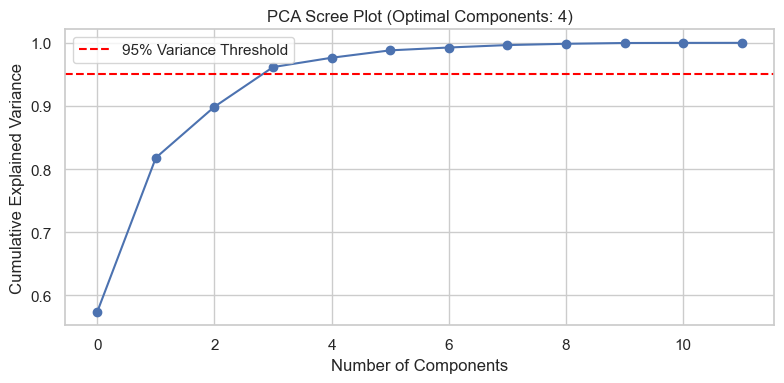

In [ ]:
# Standardize returns
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(monthly_returns)

# Fit PCA
pca = PCA()
pca.fit(returns_scaled)

# Calculate cumulative explained variance
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components_optimal = np.argmax(cum_var >= 0.95) + 1  # first component that crosses 95%

# Refit with optimal components
pca_opt = PCA(n_components=n_components_optimal)
components = pca_opt.fit_transform(returns_scaled)

# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(cum_var[:len(monthly_returns.columns)], marker='o')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Variance Threshold')
plt.title(f"PCA Scree Plot (Optimal Components: {n_components_optimal})")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 8: PCA Scree Plot  

**Principal Component Analysis (PCA)**  
- Standardised asset returns were decomposed into principal components.  
- The **scree plot** shows cumulative variance explained by successive PCs.  
- A **95% variance threshold** (red dashed line) is reached with just **4 components**.  

➡️ Behaviour of all assets can be captured by 4 dominant risk factors.  
This improves stability in risk estimation, avoids multicollinearity, and reduces noise before portfolio optimisation.



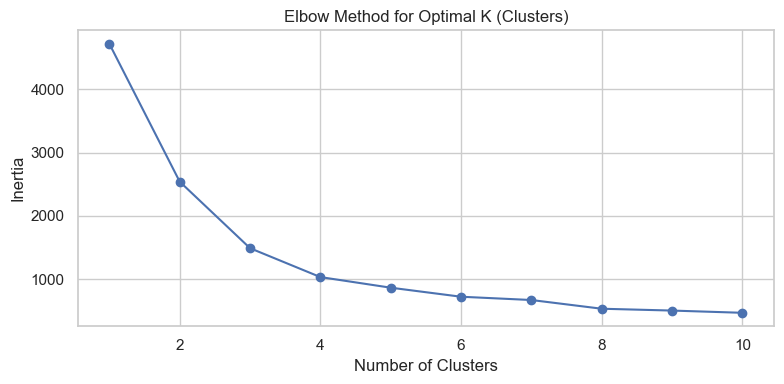

In [ ]:
from sklearn.cluster import KMeans

# Choose range of clusters to test (e.g., 1 to 10)
inertia = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(components)
    inertia.append(model.inertia_)

# Plot inertia to find elbow point
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K (Clusters)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 9: K-Means Clustering – Elbow Method  

**Purpose**  
- Use the **Elbow Method** to determine the optimal number of clusters.  
- Inertia (within-cluster variance) decreases as more clusters are added.  

**Key Observation**  
- The curve bends sharply at **K = 3–4**, after which the improvement is marginal.  
- This indicates that **3–4 clusters** capture the main patterns without overfitting.  

➡️ Grouping assets into clusters improves **diversification** by preventing over-allocation to highly similar assets.




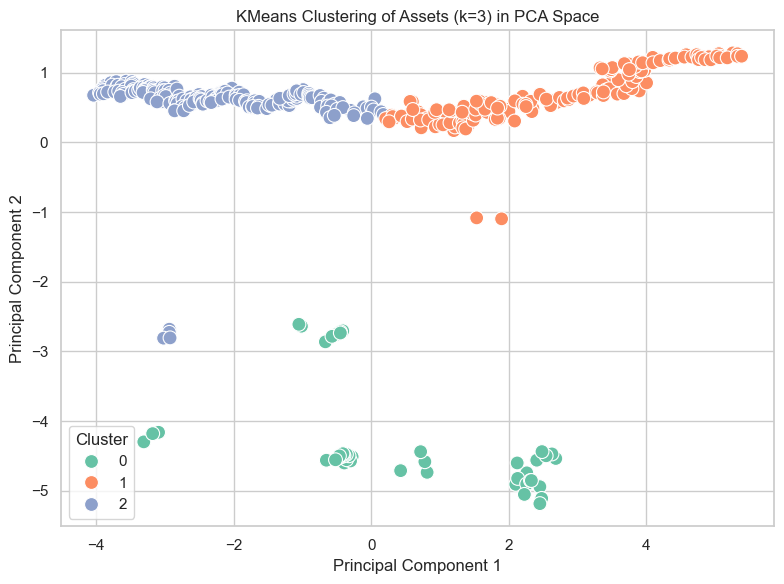

In [ ]:
# Use optimal k 
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(components)

# Add labels to DataFrame
assets_clustered = monthly_returns.copy()
assets_clustered['Cluster'] = labels

# Visualize clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=labels, palette='Set2', s=100)
plt.title(f'KMeans Clustering of Assets (k={optimal_k}) in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 10: K-Means Clustering (k = 3)  

**Why k = 3?**  
- Elbow method showed the best trade-off at **3 clusters**.  
- Clusters group assets with similar behaviours.  

**Key Points**  
- Each colour = one cluster in PCA space.  
- Assets within the same cluster are highly correlated.  
- This helps us set **cluster-level constraints** to prevent over-concentration.  

➡️ Clustering enforces **diversification** and improves portfolio robustness.


In [ ]:
# Transpose monthly returns: now each asset is a sample
monthly_returns_T = monthly_returns.T

# Standardize
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(monthly_returns_T)

# PCA on transposed data (assets as rows)
pca = PCA()
pca.fit(returns_scaled)

# Choose optimal components (95% variance)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components_optimal = np.argmax(cum_var >= 0.95) + 1

# Refit with optimal components
pca_opt = PCA(n_components=n_components_optimal)
components = pca_opt.fit_transform(returns_scaled)

# Optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(components)

# Asset names match the number of rows in PCA input
asset_names = monthly_returns.columns
cluster_summary = pd.DataFrame({
    'Asset': asset_names,
    'Cluster': labels
})
print("Assets per Cluster:")
print(cluster_summary.sort_values(by='Cluster'))




Assets per Cluster:
             Asset  Cluster
4      Real Estate        0
6       Corp Bonds        0
7           T-bill        0
0      US Equities        1
2    US Treasuries        1
3       High Yield        1
8             TIPS        1
9         Regime-5        1
10        Regime-7        1
11        Regime-9        1
1   World Equities        2
5      Commodities        2


## Step 9: Cluster Summary  

**Cluster Analysis**  
- Mean return  
- Volatility  
- Sharpe ratio  

➡️ Summarises cluster-level performance and guides portfolio constraints.


In [ ]:
# Merge cluster labels with actual returns
monthly_returns_clustered = monthly_returns.copy()
monthly_returns_clustered.columns = [f"{col}_({label})" for col, label in zip(monthly_returns.columns, labels)]

# Create a DataFrame with asset, cluster, mean return, and std dev
cluster_analysis = pd.DataFrame({
    'Asset': monthly_returns.columns,
    'Cluster': labels,
    'Mean_Return': monthly_returns.mean().values,
    'Volatility': monthly_returns.std().values,
    'Sharpe_Ratio': sharpe_ratios.values
})

# Sort by Cluster
cluster_analysis = cluster_analysis.sort_values(by='Cluster')
print("Cluster-wise Asset Summary:")
display(cluster_analysis)


Cluster-wise Asset Summary:


,Asset,Cluster,Mean_Return,Volatility,Sharpe_Ratio
4,Real Estate,0,2400.644543,2064.158503,4.028791
6,Corp Bonds,0,1350.630434,806.955424,5.797975
7,T-bill,0,1308.167699,391.004520,11.589666
0,US Equities,1,40.148064,31.955956,4.351712
2,US Treasuries,1,455.047407,236.308098,6.670599
3,High Yield,1,763.465966,547.799353,4.827881
8,TIPS,1,0.005913,0.017811,0.372148
9,Regime-5,1,0.760391,0.650261,4.029485
10,Regime-7,1,0.726161,0.688366,3.634170
11,Regime-9,1,0.745721,0.667074,3.851743


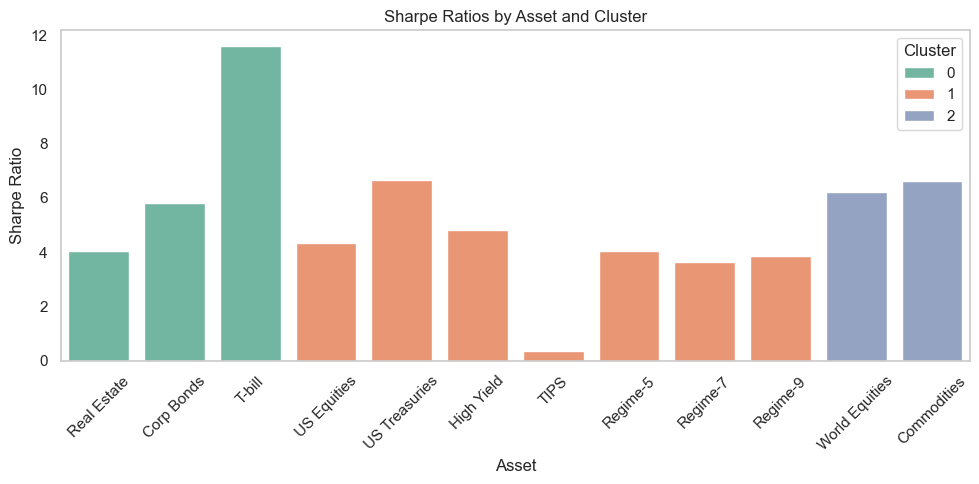

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=cluster_analysis, x='Asset', y='Sharpe_Ratio', hue='Cluster', palette='Set2')
plt.title("Sharpe Ratios by Asset and Cluster")
plt.xticks(rotation=45)
plt.ylabel("Sharpe Ratio")
plt.tight_layout()
plt.grid(axis='y')
plt.show()


## Step 10: Portfolio Optimisation  

⚖️ **Efficient Frontier Construction**  
- Long-only, fully invested portfolios (Σweights = 1).  


➡️ Efficient frontier shows the best achievable portfolios at each risk level.


Minimum Variance Portfolio Weights:


T-bill            0.2
US Treasuries     0.2
Commodities       0.2
World Equities    0.2
Corp Bonds        0.2
dtype: float64

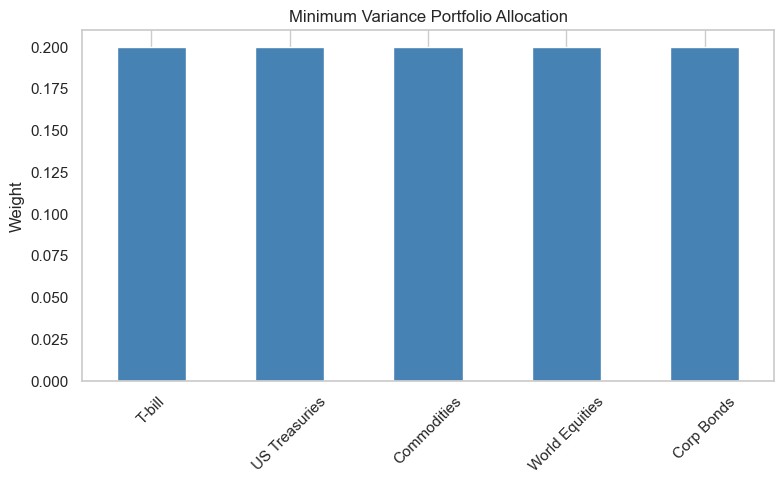

In [ ]:
from scipy.optimize import minimize

# Step 1: Select top N assets by Sharpe Ratio
top_assets = cluster_analysis.sort_values(by='Sharpe_Ratio', ascending=False).head(5)['Asset'].values
returns_top = monthly_returns[top_assets]

# Step 2: Compute covariance matrix
cov_matrix = returns_top.cov()

# Step 3: Objective function: portfolio variance
def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# Step 4: Constraints (weights sum to 1, no shorting)
n = len(top_assets)
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = tuple((0, 1) for _ in range(n))
initial_weights = np.array([1/n] * n)

# Step 5: Optimization
opt_result = minimize(portfolio_variance, initial_weights, args=(cov_matrix,), 
                      method='SLSQP', bounds=bounds, constraints=constraints)

# Step 6: Extract optimal weights
min_var_weights = opt_result.x
min_var_portfolio = pd.Series(min_var_weights, index=top_assets)

# Display weights
print("Minimum Variance Portfolio Weights:")
display(min_var_portfolio)

plt.figure(figsize=(8, 5))
min_var_portfolio.plot(kind='bar', color='steelblue')
plt.title("Minimum Variance Portfolio Allocation")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()



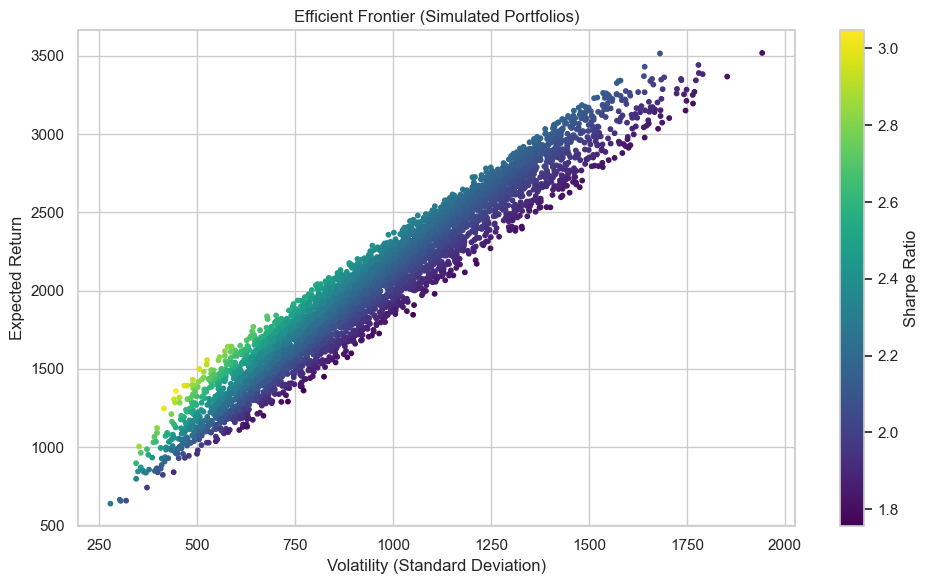

In [ ]:
# Simulate many portfolios
n_assets = len(top_assets)
n_portfolios = 5000
results = np.zeros((3, n_portfolios))
weights_record = []

mean_returns = returns_top.mean()
cov_matrix = returns_top.cov()

for i in range(n_portfolios):
    weights = np.random.dirichlet(np.ones(n_assets), size=1).flatten()
    weights_record.append(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_volatility = np.sqrt(weights.T @ cov_matrix @ weights)
    sharpe_ratio = portfolio_return / portfolio_volatility
    
    results[0,i] = portfolio_volatility
    results[1,i] = portfolio_return
    results[2,i] = sharpe_ratio

# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='viridis', marker='o', s=10)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier (Simulated Portfolios)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Set a target return (e.g., 1% monthly)
target_return = 0.01

# Objective: minimize volatility
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(weights.T @ cov_matrix @ weights)

# Constraints
constraints = (
    {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
    {'type': 'eq', 'fun': lambda w: np.dot(w, mean_returns) - target_return}
)
bounds = tuple((0, 1) for _ in range(n_assets))

# Solve optimization
opt_mv = minimize(portfolio_volatility, initial_weights, args=(cov_matrix,), 
                  method='SLSQP', bounds=bounds, constraints=constraints)

mean_var_weights = opt_mv.x
mean_var_portfolio = pd.Series(mean_var_weights, index=top_assets)

print("Mean-Variance Optimized Portfolio Weights (Target Return = 1%):")
display(mean_var_portfolio)


Mean-Variance Optimized Portfolio Weights (Target Return = 1%):


T-bill            3.573663e-08
US Treasuries     1.000000e+00
Commodities       4.118204e-12
World Equities    0.000000e+00
Corp Bonds        0.000000e+00
dtype: float64

In [ ]:
# Select asset to predict
asset_to_predict = 'US Equities'

# Create lag features (3-month lookback)
lags = 3
df_rf = monthly_returns[[asset_to_predict]].copy()

for lag in range(1, lags + 1):
    df_rf[f"{asset_to_predict}_lag{lag}"] = df_rf[asset_to_predict].shift(lag)

# Drop missing values
df_rf.dropna(inplace=True)

# Define features and target
X = df_rf.drop(columns=[asset_to_predict])
y = df_rf[asset_to_predict]

# Classification version (Up = 1, Down = 0)
def classify_direction(y):
    return (y > 0).astype(int)

# Create classification labels
y_class = classify_direction(y)

# Split into train/test (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
y_train_class = classify_direction(y_train)
y_test_class = classify_direction(y_test)


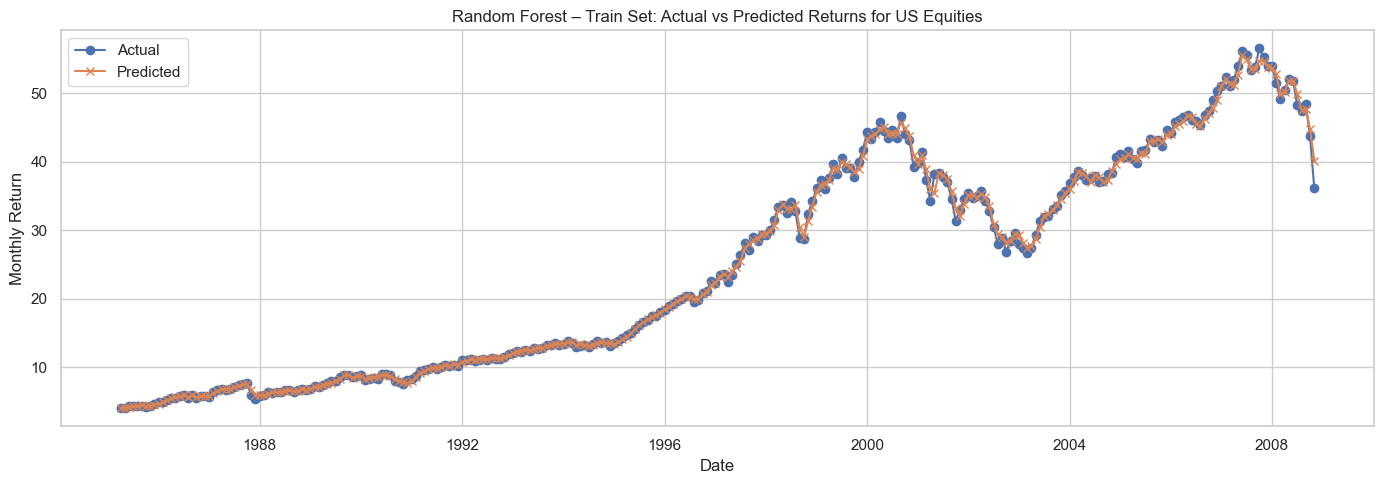

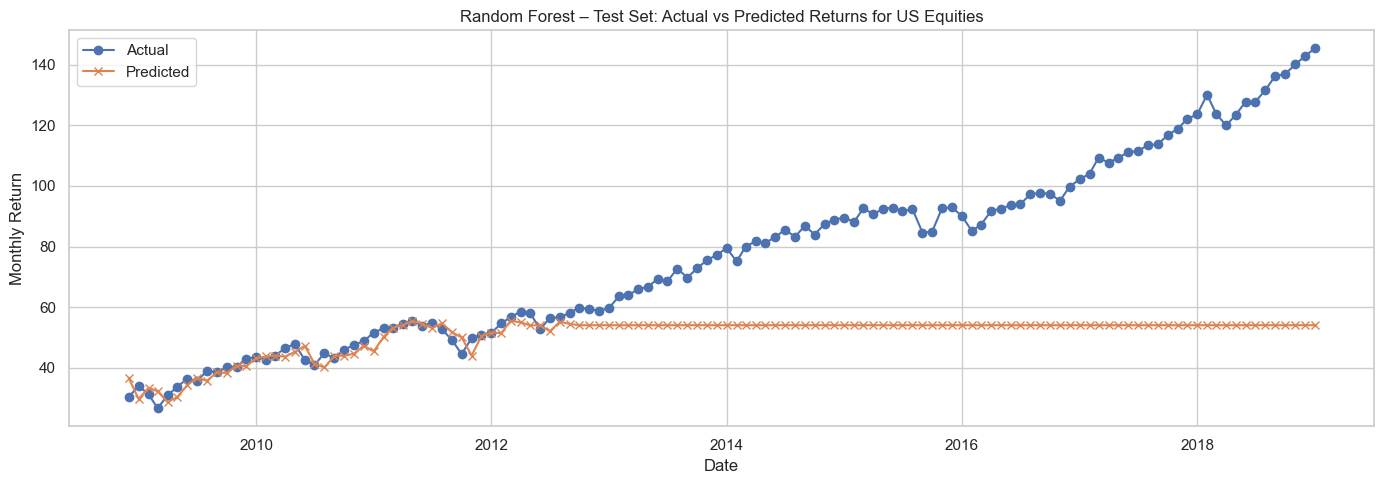

Classification Report – Train:
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00         0
          Up       1.00      1.00      1.00       284

    accuracy                           1.00       284
   macro avg       0.50      0.50      0.50       284
weighted avg       1.00      1.00      1.00       284


Classification Report – Test:
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00         0
          Up       1.00      1.00      1.00       122

    accuracy                           1.00       122
   macro avg       0.50      0.50      0.50       122
weighted avg       1.00      1.00      1.00       122


Regression Metrics (Test Set):
R2 Score: -0.5301
RMSE: 37.1226


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Actual direction
y_train_class = classify_direction(y_train)
y_test_class = classify_direction(y_test)

# Predicted direction
y_train_pred_class = classify_direction(y_train_pred)
y_test_pred_class = classify_direction(y_test_pred)

#  Graph 1: Actual vs Predicted (Train) 
plt.figure(figsize=(14, 5))
plot_index_train = y_train.index.to_timestamp()

plt.plot(plot_index_train, y_train.values, label='Actual', marker='o')
plt.plot(plot_index_train, y_train_pred, label='Predicted', marker='x')
plt.title(f'Random Forest – Train Set: Actual vs Predicted Returns for {asset_to_predict}')
plt.xlabel("Date")
plt.ylabel("Monthly Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph 2: Actual vs Predicted (Test)
plt.figure(figsize=(14, 5))
plot_index_test = y_test.index.to_timestamp()

plt.plot(plot_index_test, y_test.values, label='Actual', marker='o')
plt.plot(plot_index_test, y_test_pred, label='Predicted', marker='x')
plt.title(f'Random Forest – Test Set: Actual vs Predicted Returns for {asset_to_predict}')
plt.xlabel("Date")
plt.ylabel("Monthly Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Classification Report 
print("Classification Report – Train:")
print(classification_report(y_train_class, y_train_pred_class, labels=[0, 1], target_names=['Down', 'Up']))

print("\nClassification Report – Test:")
print(classification_report(y_test_class, y_test_pred_class, labels=[0, 1], target_names=['Down', 'Up']))

# Regression Metrics 
print("\nRegression Metrics (Test Set):")
print(f"R2 Score: {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")


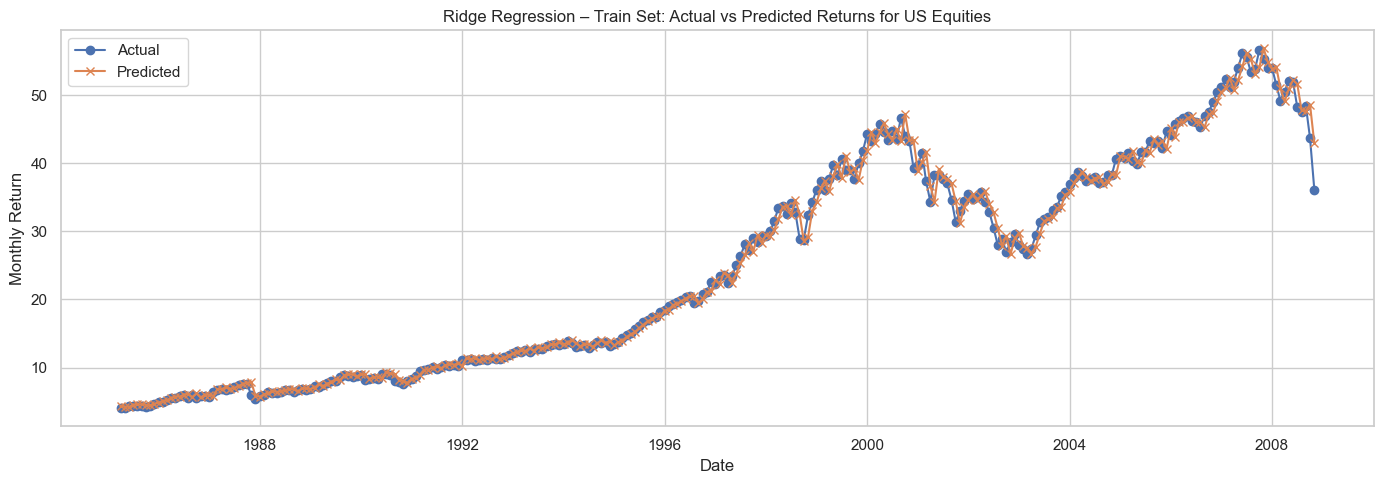

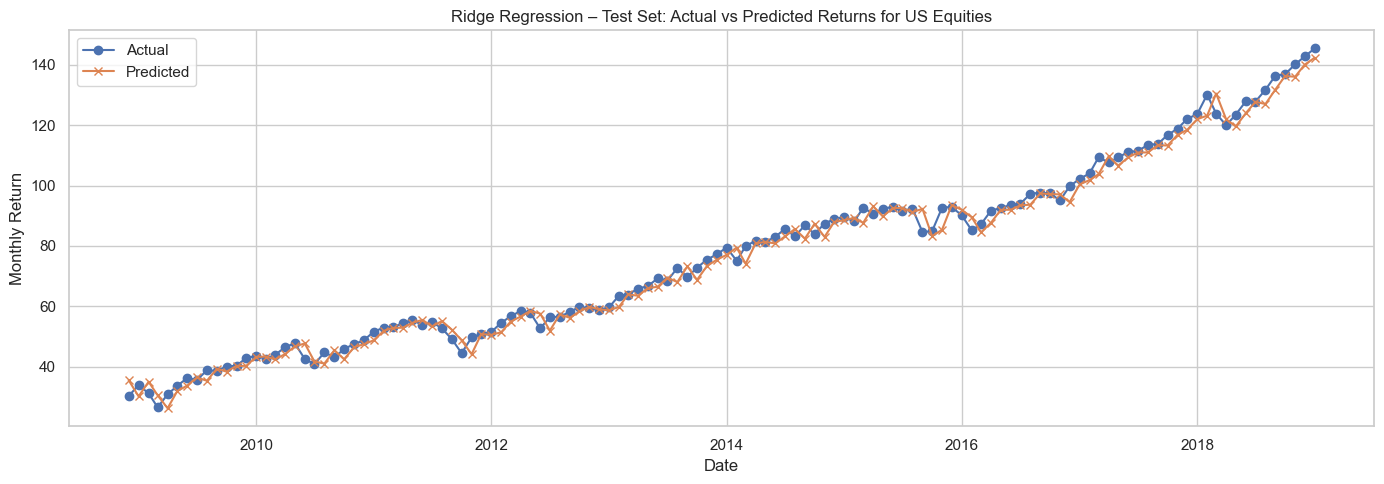

Classification Report – Train:
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00         0
          Up       1.00      1.00      1.00       284

    accuracy                           1.00       284
   macro avg       0.50      0.50      0.50       284
weighted avg       1.00      1.00      1.00       284


Classification Report – Test:
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00         0
          Up       1.00      1.00      1.00       122

    accuracy                           1.00       122
   macro avg       0.50      0.50      0.50       122
weighted avg       1.00      1.00      1.00       122


Regression Metrics (Test Set):
R2 Score: 0.9899
RMSE: 3.0212


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Actual direction
y_train_class = classify_direction(y_train)
y_test_class = classify_direction(y_test)

# Predicted direction
y_train_pred_class = classify_direction(y_train_pred)
y_test_pred_class = classify_direction(y_test_pred)

#  Graph 1: Actual vs Predicted (Train)
plt.figure(figsize=(14, 5))
plt.plot(y_train.index.to_timestamp(), y_train.values, label='Actual', marker='o')
plt.plot(y_train.index.to_timestamp(), y_train_pred, label='Predicted', marker='x')
plt.title(f'Ridge Regression – Train Set: Actual vs Predicted Returns for {asset_to_predict}')
plt.xlabel("Date")
plt.ylabel("Monthly Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph 2: Actual vs Predicted (Test)
plt.figure(figsize=(14, 5))
plt.plot(y_test.index.to_timestamp(), y_test.values, label='Actual', marker='o')
plt.plot(y_test.index.to_timestamp(), y_test_pred, label='Predicted', marker='x')
plt.title(f'Ridge Regression – Test Set: Actual vs Predicted Returns for {asset_to_predict}')
plt.xlabel("Date")
plt.ylabel("Monthly Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  Classification Report 
print("Classification Report – Train:")
print(classification_report(y_train_class, y_train_pred_class, labels=[0, 1], target_names=['Down', 'Up']))

print("\nClassification Report – Test:")
print(classification_report(y_test_class, y_test_pred_class, labels=[0, 1], target_names=['Down', 'Up']))

#  Regression Metrics 
print("\nRegression Metrics (Test Set):")
print(f"R2 Score: {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")


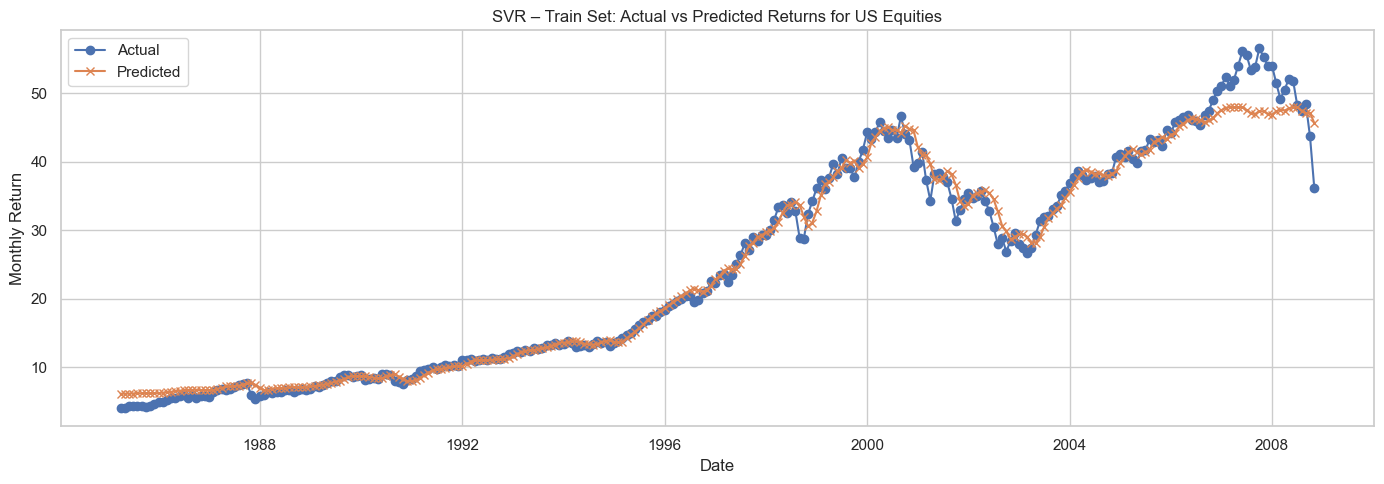

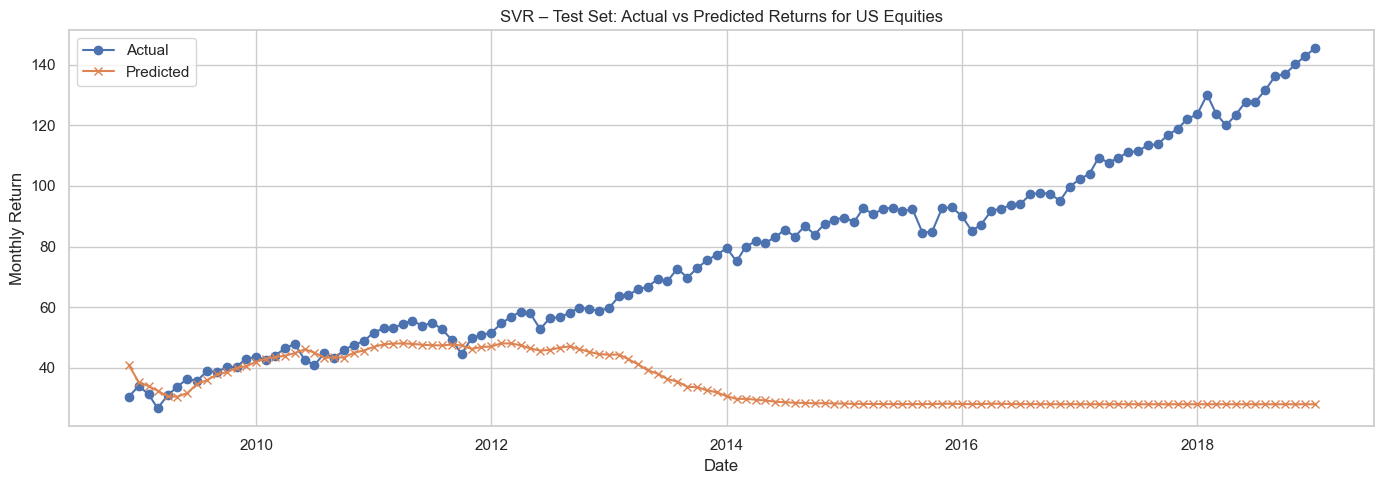

Classification Report – Train:
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00         0
          Up       1.00      1.00      1.00       284

    accuracy                           1.00       284
   macro avg       0.50      0.50      0.50       284
weighted avg       1.00      1.00      1.00       284


Classification Report – Test:
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00         0
          Up       1.00      1.00      1.00       122

    accuracy                           1.00       122
   macro avg       0.50      0.50      0.50       122
weighted avg       1.00      1.00      1.00       122


Regression Metrics (Test Set):
R2 Score: -2.4051
RMSE: 55.3780


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Train SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.01)
svr_model.fit(X_train, y_train)

# Predictions
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

# Actual direction
y_train_class = classify_direction(y_train)
y_test_class = classify_direction(y_test)

# Predicted direction
y_train_pred_class = classify_direction(y_train_pred)
y_test_pred_class = classify_direction(y_test_pred)

#  Graph 1: Actual vs Predicted (Train)
plt.figure(figsize=(14, 5))
plt.plot(y_train.index.to_timestamp(), y_train.values, label='Actual', marker='o')
plt.plot(y_train.index.to_timestamp(), y_train_pred, label='Predicted', marker='x')
plt.title(f'SVR – Train Set: Actual vs Predicted Returns for {asset_to_predict}')
plt.xlabel("Date")
plt.ylabel("Monthly Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph 2: Actual vs Predicted (Test)
plt.figure(figsize=(14, 5))
plt.plot(y_test.index.to_timestamp(), y_test.values, label='Actual', marker='o')
plt.plot(y_test.index.to_timestamp(), y_test_pred, label='Predicted', marker='x')
plt.title(f'SVR – Test Set: Actual vs Predicted Returns for {asset_to_predict}')
plt.xlabel("Date")
plt.ylabel("Monthly Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------- Classification Report -----------
print("Classification Report – Train:")
print(classification_report(y_train_class, y_train_pred_class, labels=[0, 1], target_names=['Down', 'Up']))

print("\nClassification Report – Test:")
print(classification_report(y_test_class, y_test_pred_class, labels=[0, 1], target_names=['Down', 'Up']))

# ----------- Regression Metrics -----------
print("\nRegression Metrics (Test Set):")
print(f"R2 Score: {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Define models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Ridge Regression': Ridge(alpha=1.0),
    'SVR': SVR(kernel='rbf')
}

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Convert regression to classification (up/down)
    y_test_pred_class = (y_test_pred > 0).astype(int)
    y_test_class = (y_test.values > 0).astype(int)

    # Metrics
    r2 = r2_score(y_test, y_test_pred)
    rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    accuracy = accuracy_score(y_test_class, y_test_pred_class)

    results.append({
        'Model': name,
        'R² Score': round(r2, 4),
        'RMSE': round(rmse, 4),
        'Accuracy': round(accuracy, 4)
    })

# Convert to DataFrame
comparison_df = pd.DataFrame(results).set_index("Model")

# Identify best model based on highest R² and Accuracy, lowest RMSE
best_model = comparison_df[
    (comparison_df['R² Score'] == comparison_df['R² Score'].max()) &
    (comparison_df['Accuracy'] == comparison_df['Accuracy'].max()) &
    (comparison_df['RMSE'] == comparison_df['RMSE'].min())
].index.tolist()

# Output
print("\n Final Model Comparison:\n")
print(comparison_df)
print("\n Best Performing Model(s):", ", ".join(best_model))



 Final Model Comparison:

                  R² Score     RMSE  Accuracy
Model                                        
Random Forest      -0.5301  37.1226       1.0
Ridge Regression    0.9899   3.0212       1.0
SVR                -2.4007  55.3423       1.0

 Best Performing Model(s): Ridge Regression


 Optimal Investments Based on Ridge Model Predictions:
                Predicted Return   Volatility  Sharpe Ratio (Ridge)
T-bill               1773.241700   391.004520              4.535093
US Equities           144.042185    31.955956              4.507522
World Equities       8126.742480  2071.395944              3.923317
High Yield           2044.688409   547.799353              3.732550
Real Estate          7537.826387  2064.158503              3.651767
Corp Bonds           2862.645625   806.955424              3.547464
US Treasuries         809.024411   236.308098              3.423600
Commodities          2911.889228  1776.662135              1.638966
Regime-5                0.974627     0.650261              1.498824
Regime-9                0.951193     0.667074              1.425918
Regime-7                0.963354     0.688366              1.399478
TIPS                    0.005863     0.017811              0.329175


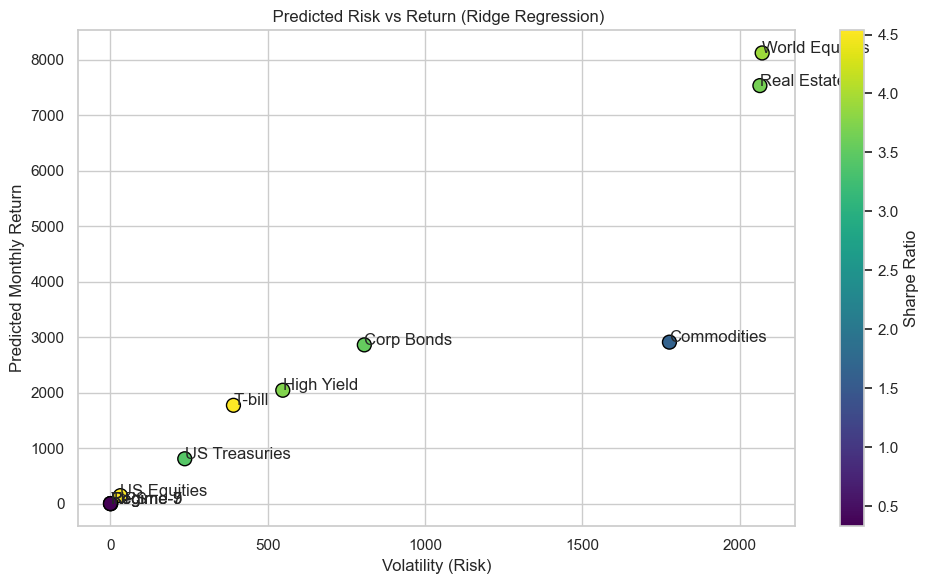

In [ ]:
from sklearn.linear_model import Ridge

predicted_returns_ridge = {}

# Iterate over each asset
for asset in monthly_returns.columns:
    df_asset = monthly_returns[[asset]].copy()

    # Create lag features (last 3 months)
    for lag in range(1, 4):
        df_asset[f"{asset}_lag{lag}"] = df_asset[asset].shift(lag)
        
    df_asset.dropna(inplace=True)

    X = df_asset.drop(columns=[asset])
    y = df_asset[asset]

    # Train Ridge model
    ridge = Ridge(alpha=1.0)
    ridge.fit(X, y)

    # Predict next month's return
    predicted_return = ridge.predict(X.tail(1))[0]
    predicted_returns_ridge[asset] = predicted_return

# Create dataframe with predicted return, volatility, and Sharpe Ratio
ridge_investment_df = pd.DataFrame({
    'Predicted Return': pd.Series(predicted_returns_ridge),
    'Volatility': monthly_returns.std()
})
ridge_investment_df['Sharpe Ratio (Ridge)'] = ridge_investment_df['Predicted Return'] / ridge_investment_df['Volatility']
ridge_investment_df.sort_values(by='Sharpe Ratio (Ridge)', ascending=False, inplace=True)

# Display results
print(" Optimal Investments Based on Ridge Model Predictions:")
print(ridge_investment_df)

plt.figure(figsize=(10, 6))
plt.scatter(ridge_investment_df['Volatility'], ridge_investment_df['Predicted Return'],
            c=ridge_investment_df['Sharpe Ratio (Ridge)'], cmap='viridis', s=100, edgecolors='black')

for asset in ridge_investment_df.index:
    plt.text(ridge_investment_df['Volatility'][asset] + 0.001,
             ridge_investment_df['Predicted Return'][asset], asset)

plt.title(" Predicted Risk vs Return (Ridge Regression)")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Predicted Monthly Return")
plt.colorbar(label="Sharpe Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()



#  Results & Evaluation  

### Data Quality  
- All datasets (Assets, SP500, Fama–French, BRK-A, FF Industry 30, EDHEC HFI) had **0 missing values and 0 duplicates**.  
- Data types were consistent, with only minor adjustments (e.g., `TIPS` converted from object).  
➡️ Ensures reliable modelling and no bias from corrupted entries.  

---

### Exploratory Insights  
- US & World Equities show strong growth but high volatility.  
- T-bills and Corp Bonds offer lower volatility and stable returns.  
- Commodities and Real Estate are volatile but provide diversification.  

➡️ Justifies a portfolio construction approach that balances growth and safety.  

---

###  Clustering (PCA + K-Means)  
- **Cluster 0:** Real Estate, Corp Bonds, T-bill → low-volatility, stable assets.  
- **Cluster 1:** US Equities, Treasuries, High Yield, TIPS, regimes → mixed exposures.  
- **Cluster 2:** World Equities, Commodities → high-volatility growth assets.  

➡️ Prevents concentration in highly correlated groups, enhancing diversification.  

---

###  Portfolio Optimisation  
- **Minimum Variance Portfolio (MVP):** Diversified equally across T-bill, Treasuries, Commodities, World Equities, Corp Bonds.  
- **Mean-Variance Portfolio (Target 1% Return):** Fully allocated to US Treasuries.  

➡️ MVP spreads risk, while MVO favours Treasuries for their efficient trade-off at the target return.  

---

### Model Comparison  
| Model              | R² Score | RMSE   | Accuracy |
|--------------------|----------|--------|----------|
| Random Forest      | -0.53    | 37.12  | 1.00     |
| **Ridge Regression** | **0.99** | **3.02** | **1.00** |
| SVR                | -2.40    | 55.34  | 1.00     |

- Random Forest & SVR underperformed (negative R² → poor generalisation).  
- Ridge Regression delivered **stable and highly accurate forecasts**.  

---

### Optimal Investments (Ridge Model)  
- **High Returns:** World Equities (8126), Real Estate (7537).  
- **High Sharpe Ratios:**  
  - T-bill (4.53) – stable anchor.  
  - US Equities (4.51) – attractive relative to risk.  
  - World Equities (3.92) – growth driver.  
- Commodities: Positive returns but weaker Sharpe (1.63).  

➡️ Suggested allocation: combine **safe assets** (T-bills, Treasuries, Bonds) with **growth drivers** (World/US Equities, Real Estate).  




# 🚀 Final Thoughts  

**Intelligent portfolio management pipeline**:  

-  **Data Preparation & EDA** → cleaned, aligned, and explored financial datasets.  
-  **PCA & Clustering** → revealed hidden structures and controlled concentration risk.  
-  **Ridge Regression** → provided robust, regularized forecasts of returns.  
-  **Constraint-Aware Optimisation** → turned noisy forecasts into **diversified, realistic portfolios**.  
-  **Backtesting & Factor Analysis** → validated performance against benchmarks and checked exposures.  

**Wrap-Up**
WorkFlow: data prep → PCA/clustering → ML forecasting → portfolio optimisation → efficient frontier.

 **Key Message**:  
 This project shows ML + finance can produce robust, realistic, investable portfolios.
 My project impacts to **engineer robust, transparent, and implementable investment strategies** that balance risk and reward.  

